Student Name: Chi Nguyen


Machine Learning for Public Policy


HW3 - Applying a machine learning pipeline to the donors dataset


Pipeline codes are in the files preprocess.py and build_models.py

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np
import preprocess
import build_models
import mlhelperfunctions

# Load data, process and explore

In [4]:
donors = preprocess.import_csv("projects_2012_2013.csv")
donors.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [5]:
preprocess.explore_data(donors)

Let's take a look at the first 10 lines of the dataframe!

                          projectid                    teacher_acctid  \
0  00001ccc0e81598c4bd86bacb94d7acb  96963218e74e10c3764a5cfb153e6fea   
1  0000fa3aa8f6649abab23615b546016d  2a578595fe351e7fce057e048c409b18   
2  000134f07d4b30140d63262c871748ff  26bd60377bdbffb53a644a16c5308e82   
3  0001f2d0b3827bba67cdbeaa248b832d  15d900805d9d716c051c671827109f45   
4  0004536db996ba697ca72c9e058bfe69  400f8b82bb0143f6a40b217a517fe311   
5  00049ec8ca1f2d08cb13cab31b0b85ec  7149611553c700de9a6099f8a9ce598b   
6  0004d2fdbb571237fa53a97e7691440b  926671e209fb977bd5123145c1848ad1   
7  0004ee26667e751dd51384eb9f30c72e  abe4dabb7864f4c548d230cf9070e03f   
8  0006a31d45f8d52d217e7c5b55c11f37  3b5fada1ad0e339acc669829071320c4   
9  0008ac907bf237a15a959244205d3ee5  92527a5ac5fe946ed1961fb2e1de8cc5   

                           schoolid  school_ncesid  school_latitude  \
0  9f3f9f2c2da7edda5648ccd10554ed8c   1.709930e+11        41.80765

In [6]:
preprocess.pre_process(donors)

Brief overview of the number of missingobservations for each column:

secondary_focus_area                      40556
secondary_focus_subject                   40556
school_metro                              15224
school_ncesid                              9233
school_district                             172
students_reached                             59
resource_type                                17
primary_focus_area                           15
primary_focus_subject                        15
grade_level                                   3
schoolid                                      0
teacher_acctid                                0
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
datefullyfunded                               0
school_magnet                                 0
school_county                                 0
school_charter    

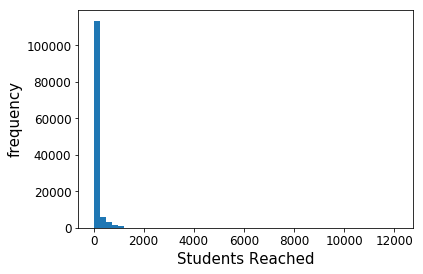

In [7]:
preprocess.create_hist(donors, 'students_reached', 'Students Reached', 
                       'frequency', "Histogram of number of students reached")

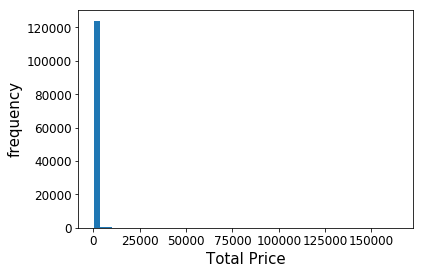

In [8]:
preprocess.create_hist(donors, 'total_price_including_optional_support', 'Total Price', 
                       'frequency', "Histogram of total price")

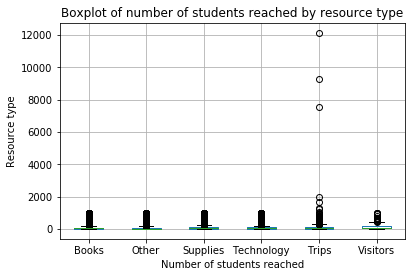

In [9]:
preprocess.create_boxplot(donors, 'students_reached', 'resource_type', 
                          'Number of students reached', 'Resource type',
                          'Boxplot of number of students reached by resource type')

In [10]:
geometry = [Point(xy) for xy in zip(donors['school_longitude'], donors['school_latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(donors, crs=crs, geometry = geometry)
geo_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,geometry
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13,POINT (-87.67325699999999 41.807654)
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12,POINT (-119.296596 34.296596)
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12,POINT (-118.257834 34.078625)
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12,POINT (-73.98821700000001 40.687286)
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13,POINT (-73.205635 40.793018)


In [11]:
donors['students_reached'].corr(donors['total_price_including_optional_support'])

0.1766413409817781

In [12]:
cols_to_transform_to_datetime = ['date_posted', 'datefullyfunded']
preprocess.convert_to_datetime(donors, cols_to_transform_to_datetime)
donors.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                    float64
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

In [13]:
preprocess.convert_to_categorical_using_qcut(donors, 'students_reached',
                                             'students_reached_group', 3, 
                                             ['low', 'medium', 'high'])
preprocess.convert_to_categorical_using_qcut(donors, 'total_price_including_optional_support',
                                             'price_group', 3, 
                                             ['low', 'medium', 'high'])
cols_to_transform_to_binary = ['school_state', 'school_metro',
                               'school_charter', 'school_magnet',
                               'primary_focus_subject', 'resource_type',
                               'poverty_level', 'grade_level', 'students_reached_group', 'price_group']
donors = preprocess.convert_to_binary(donors, cols_to_transform_to_binary)

In [14]:
donors['time_to_fund'] = donors['datefullyfunded'] - donors['date_posted']
donors['fund_within_60'] = np.where(donors['time_to_fund'] <= pd.to_timedelta(60, unit='D'), 1, 0)

# Create features and outcome

In [15]:
l = donors.columns.tolist()
selected_features = l[72:134]
selected_features

['school_metro_suburban',
 'school_metro_urban',
 'school_metro_nan',
 'school_charter_f',
 'school_charter_t',
 'school_charter_nan',
 'school_magnet_f',
 'school_magnet_t',
 'school_magnet_nan',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 '

# Build models and create a dataframe to store evaluation metrics

In [16]:
grid_size = 'mini'
clfs, grid = mlhelperfunctions.define_clfs_params(grid_size)
models_to_run = ['RF', 'AB', 'LR', 'DT', 'GB', 'SVM', 'KNN']
clean_df = donors
predictors = selected_features
outcome = 'fund_within_60'
date_col = 'date_posted'
prediction_windows = [6]
start_time = '2012-01-01'
end_time = '2013-12-31'

In [17]:
results_df = build_models.clf_loop_cross_validation(models_to_run, clfs, grid, clean_df, predictors, outcome,
                                                    date_col, prediction_windows, start_time, end_time)
results_df

RF
Added row 1
Added row 2
Added row 3
Added row 4
Added row 5
Added row 6
Added row 7
Added row 8
AB
Added row 9
Added row 10
Added row 11
Added row 12
Added row 13
Added row 14
LR


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 15


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 16


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 17


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 18


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 19


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 20


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 21


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 22
DT
Added row 23
Added row 24
Added row 25
Added row 26
Added row 27
Added row 28
Added row 29
Added row 30
Added row 31
Added row 32
Added row 33
Added row 34
Added row 35
Added row 36
Added row 37
Added row 38
Added row 39
Added row 40
Added row 41
Added row 42
Added row 43
Added row 44
Added row 45
Added row 46
Added row 47
Added row 48
Added row 49
Added row 50
Added row 51
Added row 52
Added row 53
Added row 54
Added row 55
Added row 56
Added row 57
Added row 58
Added row 59
Added row 60
Added row 61
Added row 62
Added row 63
Added row 64
Added row 65
Added row 66
Added row 67
Added row 68
Added row 69
Added row 70
Added row 71
Added row 72
Added row 73
Added row 74
Added row 75
Added row 76
Added row 77
Added row 78
Added row 79
Added row 80
Added row 81
Added row 82
Added row 83
Added row 84
Added row 85
Added row 86
Added row 87
Added row 88
Added row 89
Added row 90
Added row 91
Added row 92
Added row 93
Added row 94
GB
Added row 95
Added row 96
Added row 97
Added 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Added row 115
KNN
Added row 116
RF
Added row 117
Added row 118
Added row 119
Added row 120
Added row 121
Added row 122
Added row 123
Added row 124
AB
Added row 125
Added row 126
Added row 127
Added row 128
Added row 129
Added row 130
LR


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 131


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 132


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 133


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 134


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 135


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 136


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 137


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 138
DT
Added row 139
Added row 140
Added row 141
Added row 142
Added row 143
Added row 144
Added row 145
Added row 146
Added row 147
Added row 148
Added row 149
Added row 150
Added row 151
Added row 152
Added row 153
Added row 154
Added row 155
Added row 156
Added row 157
Added row 158
Added row 159
Added row 160
Added row 161
Added row 162
Added row 163
Added row 164
Added row 165
Added row 166
Added row 167
Added row 168
Added row 169
Added row 170
Added row 171
Added row 172
Added row 173
Added row 174
Added row 175
Added row 176
Added row 177
Added row 178
Added row 179
Added row 180
Added row 181
Added row 182
Added row 183
Added row 184
Added row 185
Added row 186
Added row 187
Added row 188
Added row 189
Added row 190
Added row 191
Added row 192
Added row 193
Added row 194
Added row 195
Added row 196
Added row 197
Added row 198
Added row 199
Added row 200
Added row 201
Added row 202
Added row 203
Added row 204
Added row 205
Added row 206
Added row 207
Added row 208
Add

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Added row 231
KNN
Added row 232
RF
Added row 233
Added row 234
Added row 235
Added row 236
Added row 237
Added row 238
Added row 239
Added row 240
AB
Added row 241
Added row 242
Added row 243
Added row 244
Added row 245
Added row 246
LR


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 247


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 248


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 249


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 250


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 251


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 252


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 253


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Added row 254
DT
Added row 255
Added row 256
Added row 257
Added row 258
Added row 259
Added row 260
Added row 261
Added row 262
Added row 263
Added row 264
Added row 265
Added row 266
Added row 267
Added row 268
Added row 269
Added row 270
Added row 271
Added row 272
Added row 273
Added row 274
Added row 275
Added row 276
Added row 277
Added row 278
Added row 279
Added row 280
Added row 281
Added row 282
Added row 283
Added row 284
Added row 285
Added row 286
Added row 287
Added row 288
Added row 289
Added row 290
Added row 291
Added row 292
Added row 293
Added row 294
Added row 295
Added row 296
Added row 297
Added row 298
Added row 299
Added row 300
Added row 301
Added row 302
Added row 303
Added row 304
Added row 305
Added row 306
Added row 307
Added row 308
Added row 309
Added row 310
Added row 311
Added row 312
Added row 313
Added row 314
Added row 315
Added row 316
Added row 317
Added row 318
Added row 319
Added row 320
Added row 321
Added row 322
Added row 323
Added row 324
Add

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Added row 347
KNN
Added row 348


,model_type,clf,parameters,split_date,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,...,recall_at_30,recall_at_50,f1_at_5,f1_at_20,f1_at_50,auc-roc,target_threshold_top_5_percent,precision_at_target,recall_at_target,f1_at_target
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2013-06-30,0.715321,1.000000,1.000000,1.000000,0.772923,0.786078,...,0.359557,0.639146,0.130620,0.343514,0.752384,0.610885,0.832046,1.000000,0.011614,0.022961
1,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2013-06-30,0.715321,0.977324,0.899207,0.884964,0.911705,0.880362,...,0.363133,0.574177,0.115594,0.384716,0.675905,0.659267,0.737191,0.969231,0.009968,0.019734
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2013-06-30,0.715321,1.000000,1.000000,0.982337,0.991170,0.580419,...,0.254589,0.534177,0.128313,0.253642,0.628818,0.537678,0.733548,1.000000,0.010253,0.020298
3,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2013-06-30,0.715321,0.818594,0.908267,0.910326,0.861897,0.883305,...,0.362278,0.567627,0.118907,0.386002,0.668194,0.655112,0.753928,0.975976,0.010285,0.020355
4,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 10, 'max_features': 'sqrt', 'min...",2013-06-30,0.715321,0.802721,0.848245,0.864130,0.828164,0.876853,...,0.357089,0.571835,0.112873,0.383183,0.673149,0.650998,0.890756,0.788804,0.009810,0.019379
5,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 10, 'max_features': 'sqrt', 'min...",2013-06-30,0.715321,0.941043,0.932050,0.924819,0.910573,0.887380,...,0.362848,0.572247,0.120800,0.387783,0.673633,0.669569,0.861312,0.947368,0.011392,0.022514
6,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 10, 'max_features': 'sqrt', 'min...",2013-06-30,0.715321,0.829932,0.864100,0.877717,0.846502,0.875156,...,0.360854,0.566962,0.114647,0.382441,0.667412,0.650445,0.890187,0.821883,0.010222,0.020192
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 10, 'max_features': 'sqrt', 'min...",2013-06-30,0.715321,0.952381,0.935447,0.928442,0.909667,0.888851,...,0.363354,0.571487,0.121273,0.388426,0.672739,0.669207,0.855489,0.949602,0.011329,0.022391
8,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",2013-06-30,0.715321,1.000000,1.000000,1.000000,0.772923,0.786078,...,0.359557,0.639146,0.130620,0.343514,0.752384,0.610885,0.658718,1.000000,0.009177,0.018188
9,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 10}",2013-06-30,0.715321,1.000000,1.000000,0.794384,0.841295,0.860441,...,0.359557,0.588165,0.103762,0.376011,0.692371,0.652152,0.603400,1.000000,0.008418,0.016695


In [18]:
results_df.to_csv('ml_results.csv')

# Evaluating models

In [35]:
summary = pd.pivot_table(results_df,
                         index=['model_type', 'split_date'],
                         aggfunc='mean',
                         fill_value=0)
f1_list = ['f1_at_5', 'f1_at_20', 'f1_at_50']
p_list = ['p_at_1', 'p_at_2', 'p_at_5', 
          'p_at_10', 'p_at_20', 'p_at_30', 'p_at_50']
recall_list = ['recall_at_1', 'recall_at_2', 'recall_at_5', 
               'recall_at_10', 'recall_at_20', 'recall_at_30', 'recall_at_50']

In [36]:
summary

auc-roc  baseline  f1_at_20   f1_at_5  f1_at_50  \
model_type split_date                                                     
AB         2012-06-30  0.632256  0.743032  0.349628  0.119855  0.698196   
           2012-12-30  0.639311  0.685265  0.357432  0.125538  0.692647   
           2013-06-30  0.645480  0.715321  0.370479  0.121086  0.702429   
DT         2012-06-30  0.598047  0.743032  0.357609  0.110571  0.692126   
           2012-12-30  0.606762  0.685265  0.351607  0.106765  0.679054   
           2013-06-30  0.612850  0.715321  0.367046  0.109087  0.692733   
GB         2012-06-30  0.616391  0.743032  0.350783  0.110578  0.680277   
           2012-12-30  0.626390  0.685265  0.362346  0.111347  0.683810   
           2013-06-30  0.636728  0.715321  0.368066  0.114392  0.687179   
KNN        2012-06-30  0.573257  0.743032  0.357846  0.109278  0.636312   
           2012-12-30  0.585313  0.685265  0.328840  0.135982  0.713547   
           2013-06-30  0.596646  0.715321  0.353258  0.130620  0.666555   
LR         2012-06-30  0.650080  0.743032  0.370317  0.116443  0.677254   
           2012-12-30  0.655252  0.685265  0.382449  0.117935  0.673868   
           2013-06-30  0.667808  0.715321  0.386664  0.117132  0.676040   
RF         2012-06-30  0.614893  0.743032  0.357241  0.114295  0.678851   
           2012-12-30  0.615069  0.685265  0.368318  0.117230  0.690845   
           2013-06-30  0.637895  0.715321  0.363713  0.120378  0.676529   
SVM        2012-06-30  0.657016  0.743032  0.377206  0.115417  0.669369   
           2012-12-30  0.659019  0.685265  0.384177  0.121043  0.664956   
           2013-06-30  0.670526  0.715321  0.387526  0.119321  0.673067   

                       f1_at_target    p_at_1   p_at_10    p_at_2   p_at_20  \
model_type split_date                                                         
AB         2012-06-30      0.015540  0.968496  0.875735  0.951801  0.824356   
           2012-12-30      0.016898  0.947773  0.855991  0.949693  0.791167   
           2013-06-30      0.016216  0.951247  0.851181  0.954511  0.847783   
DT         2012-06-30      0.020608  0.898797  0.832619  0.913728  0.843173   
           2012-12-30      0.022170  0.877368  0.800627  0.878712  0.778274   
           2013-06-30      0.022120  0.921139  0.845389  0.917343  0.839926   
GB         2012-06-30      0.020286  0.927020  0.841544  0.907820  0.827079   
           2012-12-30      0.020481  0.858583  0.845593  0.900346  0.802045   
           2013-06-30      0.020011  0.908163  0.843078  0.912727  0.842261   
KNN        2012-06-30      0.026508  1.000000  0.687462  1.000000  0.843731   
           2012-12-30      0.028761  1.000000  0.623041  1.000000  0.727880   
           2013-06-30      0.027527  1.000000  0.654517  1.000000  0.808376   
LR         2012-06-30      0.020636  0.943979  0.900829  0.927321  0.873136   
           2012-12-30      0.022875  0.923387  0.867454  0.915035  0.846544   
           2013-06-30      0.021687  0.919501  0.905281  0.927803  0.884819   
RF         2012-06-30      0.018546  0.884527  0.831900  0.907344  0.842304   
           2012-12-30      0.020382  0.885945  0.755242  0.830357  0.815265   
           2013-06-30      0.020978  0.915249  0.879075  0.923414  0.832301   
SVM        2012-06-30      0.017719  0.935976  0.910043  0.926027  0.889379   
           2012-12-30      0.020848  0.928111  0.871797  0.910599  0.850369   
           2013-06-30      0.019014  0.920635  0.907041  0.920951  0.886791   

                       ...  precision_at_target  recall_at_1  recall_at_10  \
model_type split_date  ...                                                   
AB         2012-06-30  ...             0.958705     0.013009      0.117845   
           2012-12-30  ...             0.940505     0.013828      0.124891   
           2013-06-30  ...             0.943472     0.013275      0.118977   
DT         2012-06-30  ...             0.901552     0.012073      0.112043   
           2

In [37]:
summary[f1_list]

f1_at_5  f1_at_20  f1_at_50
model_type split_date                              
AB         2012-06-30  0.119855  0.349628  0.698196
           2012-12-30  0.125538  0.357432  0.692647
           2013-06-30  0.121086  0.370479  0.702429
DT         2012-06-30  0.110571  0.357609  0.692126
           2012-12-30  0.106765  0.351607  0.679054
           2013-06-30  0.109087  0.367046  0.692733
GB         2012-06-30  0.110578  0.350783  0.680277
           2012-12-30  0.111347  0.362346  0.683810
           2013-06-30  0.114392  0.368066  0.687179
KNN        2012-06-30  0.109278  0.357846  0.636312
           2012-12-30  0.135982  0.328840  0.713547
           2013-06-30  0.130620  0.353258  0.666555
LR         2012-06-30  0.116443  0.370317  0.677254
           2012-12-30  0.117935  0.382449  0.673868
           2013-06-30  0.117132  0.386664  0.676040
RF         2012-06-30  0.114295  0.357241  0.678851
           2012-12-30  0.117230  0.368318  0.690845
           2013-06-30  0.120378  0.363713  0.676529
SVM        2012-06-30  0.115417  0.377206  0.669369
           2012-12-30  0.121043  0.384177  0.664956
           2013-06-30  0.119321  0.387526  0.673067

In [38]:
summary[p_list]

p_at_1    p_at_2    p_at_5   p_at_10   p_at_20  \
model_type split_date                                                     
AB         2012-06-30  0.968496  0.951801  0.950598  0.875735  0.824356   
           2012-12-30  0.947773  0.949693  0.923195  0.855991  0.791167   
           2013-06-30  0.951247  0.954511  0.927008  0.851181  0.847783   
DT         2012-06-30  0.898797  0.913728  0.876961  0.832619  0.843173   
           2012-12-30  0.877368  0.878712  0.785138  0.800627  0.778274   
           2013-06-30  0.921139  0.917343  0.835145  0.845389  0.839926   
GB         2012-06-30  0.927020  0.907820  0.877016  0.841544  0.827079   
           2012-12-30  0.858583  0.900346  0.818836  0.845593  0.802045   
           2013-06-30  0.908163  0.912727  0.875764  0.843078  0.842261   
KNN        2012-06-30  1.000000  1.000000  0.866707  0.687462  0.843731   
           2012-12-30  1.000000  1.000000  1.000000  0.623041  0.727880   
           2013-06-30  1.000000  1.000000  1.000000  0.654517  0.808376   
LR         2012-06-30  0.943979  0.927321  0.923539  0.900829  0.873136   
           2012-12-30  0.923387  0.915035  0.867281  0.867454  0.846544   
           2013-06-30  0.919501  0.927803  0.896739  0.905281  0.884819   
RF         2012-06-30  0.884527  0.907344  0.906497  0.831900  0.842304   
           2012-12-30  0.885945  0.830357  0.862097  0.755242  0.815265   
           2013-06-30  0.915249  0.923414  0.921592  0.879075  0.832301   
SVM        2012-06-30  0.935976  0.926027  0.915399  0.910043  0.889379   
           2012-12-30  0.928111  0.910599  0.890138  0.871797  0.850369   
           2013-06-30  0.920635  0.920951  0.913496  0.907041  0.886791   

                        p_at_30   p_at_50  
model_type split_date                      
AB         2012-06-30  0.855225  0.867880  
           2012-12-30  0.804306  0.820970  
           2013-06-30  0.861568  0.853676  
DT         2012-06-30  0.856173  0.860335  
           2012-12-30  0.793318  0.804859  
           2013-06-30  0.845328  0.841893  
GB         2012-06-30  0.844064  0.845606  
           2012-12-30  0.816839  0.810496  
           2013-06-30  0.850716  0.835142  
KNN        2012-06-30  0.739629  0.790957  
           2012-12-30  0.818615  0.845743  
           2013-06-30  0.807803  0.810078  
LR         2012-06-30  0.866036  0.841848  
           2012-12-30  0.829903  0.798712  
           2013-06-30  0.865058  0.821606  
RF         2012-06-30  0.851062  0.843834  
           2012-12-30  0.824605  0.818835  
           2013-06-30  0.829733  0.822200  
SVM        2012-06-30  0.869378  0.832047  
           2012-12-30  0.833605  0.788150  
           2013-06-30  0.865967  0.817992

In [39]:
summary[recall_list]

recall_at_1  recall_at_2  recall_at_5  recall_at_10  \
model_type split_date                                                        
AB         2012-06-30     0.013009     0.025608     0.063960      0.117845   
           2012-12-30     0.013828     0.027712     0.067348      0.124891   
           2013-06-30     0.013275     0.026672     0.064773      0.118977   
DT         2012-06-30     0.012073     0.024584     0.059005      0.112043   
           2012-12-30     0.012801     0.025641     0.057277      0.116813   
           2013-06-30     0.012855     0.025633     0.058354      0.118167   
GB         2012-06-30     0.012452     0.024425     0.059009      0.113244   
           2012-12-30     0.012527     0.026272     0.059735      0.123374   
           2013-06-30     0.012674     0.025504     0.061193      0.117844   
KNN        2012-06-30     0.013432     0.026905     0.058315      0.092510   
           2012-12-30     0.014590     0.029180     0.072951      0.090903   
           2013-06-30     0.013956     0.027943     0.069873      0.091487   
LR         2012-06-30     0.012680     0.024950     0.062139      0.121222   
           2012-12-30     0.013472     0.026701     0.063269      0.126563   
           2013-06-30     0.012832     0.025926     0.062658      0.126539   
RF         2012-06-30     0.011881     0.024412     0.060992      0.111947   
           2012-12-30     0.012926     0.024230     0.062891      0.110191   
           2013-06-30     0.012773     0.025803     0.064395      0.122876   
SVM        2012-06-30     0.012572     0.024915     0.061591      0.122462   
           2012-12-30     0.013541     0.026572     0.064936      0.127197   
           2013-06-30     0.012848     0.025734     0.063829      0.126785   

                       recall_at_20  recall_at_30  recall_at_50  
model_type split_date                                            
AB         2012-06-30      0.221863      0.345291      0.584012  
           2012-12-30      0.230866      0.352103      0.599016  
           2013-06-30      0.237031      0.361313      0.596709  
DT         2012-06-30      0.226927      0.345674      0.578936  
           2012-12-30      0.227103      0.347293      0.587261  
           2013-06-30      0.234834      0.354503      0.588473  
GB         2012-06-30      0.222596      0.340785      0.569024  
           2012-12-30      0.234040      0.357590      0.591374  
           2013-06-30      0.235487      0.356762      0.583754  
KNN        2012-06-30      0.227077      0.298620      0.532249  
           2012-12-30      0.212398      0.358368      0.617091  
           2013-06-30      0.226013      0.338766      0.566234  
LR         2012-06-30      0.234991      0.349656      0.566495  
           2012-12-30      0.247025      0.363309      0.582776  
           2013-06-30      0.247385      0.362777      0.574292  
RF         2012-06-30      0.226693      0.343611      0.567831  
           2012-12-30      0.237898      0.360990      0.597458  
           2013-06-30      0.232702      0.347963      0.574707  
SVM        2012-06-30      0.239363      0.351005      0.559900  
           2012-12-30      0.248141      0.364930      0.575069  
           2013-06-30      0.247937      0.363158      0.571766